# Singularities in Normal mixtures

In [5]:
using Turing, Plots, StatsPlots, Distributions, KernelDensity, PlotlyJS

In [19]:
@model normal_mixture(y) = begin
    a ~ Uniform(0, 1)
    b ~ Uniform(0, 1)
    mixture = MixtureModel(
        Normal[
            Normal(0.0, 1.0),
            Normal(b, 1.0)
            ], 
        [1 - a, a]
    )
    y ~ filldist(mixture, length(y))
end;

@model plain_normal(y) = begin
    μ ~ Uniform(-1, 1)
    σ ~ Uniform(0, 2)
    y ~ filldist(Normal(μ, σ), length(y))
end;

function mcmc_chain(truth, model, N, chain_length)
    data = rand(truth_dist, N)
    sample(model(data), MH(), chain_length);
end;

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:02


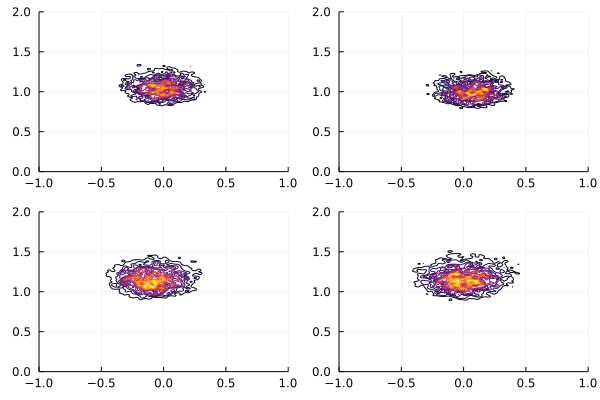

In [32]:
μₒ, σₒ = (0, 1)
truth_dist = Normal(μₒ, σₒ)
N = 50
chains = [mcmc_chain(truth_dist, plain_normal, N, 100000) for i in 1:4]
plots = [
    StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(-1, 1), ylim=(0, 2))
    for chain in chains
]
Plots.plot(plots...)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05


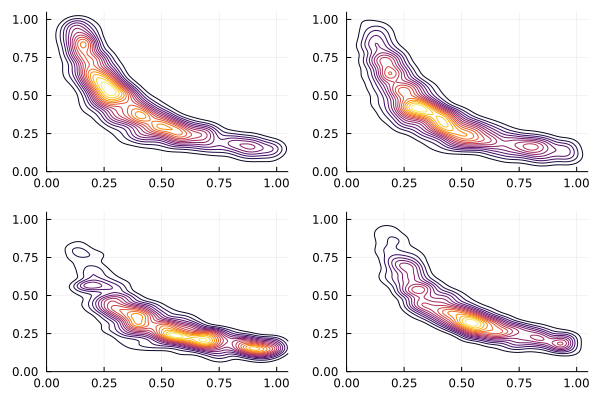

In [18]:
aₒ, bₒ = (0.5, 0.3)
truth_dist = MixtureModel(
        Normal[
            Normal(0.0, 1.0),
            Normal(bₒ, 1.0)
            ], 
        [1 - aₒ, aₒ]
    )


N = 1000
chains = [mcmc_chain(truth_dist, normal_mixture, N, 10000) for i in 1:4]
plots = [
    StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
    for chain in chains
]
Plots.plot(plots...)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:52
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:52
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:52
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:52


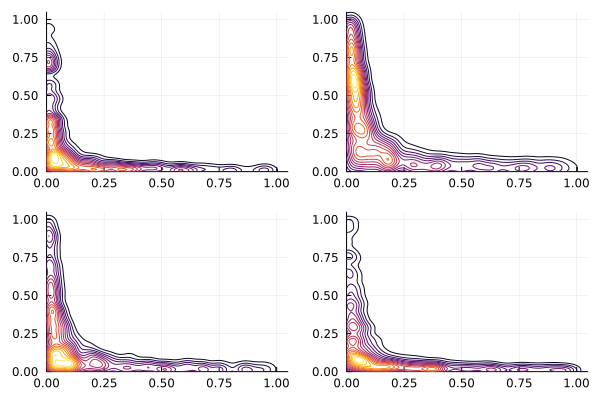

In [31]:
N = 5000
chains = [mcmc_chain(truth_dist, normal_mixture, N, 10000) for i in 1:4]
plots = [
    StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
    for chain in chains
]
Plots.plot(plots...)